# Multimodal Foundation Models For Echocardiogram Interpretation
by Matthew Christensen, Milos Vukadinovic, Neal Yuan, David Ouyang

Summary by Georgi Petrov, Course Deep Learning, SoftUni, 2024

## Abstract

EchoCLIP is a multimodal deep learning model developed to understand the relationship between cardiac ultrasound videos and expert interpretations. Traditional foundation models struggle in medical contexts due to limited training on medical texts and images. EchoCLIP, trained on over a million cardiac ultrasound videos, excels in assessing cardiac functions and identifying intracardiac devices without explicit training. Additionally, its variant, EchoCLIP-R, can accurately identify patients, detect clinical changes, and facilitate image-to-text searches, making it useful for preliminary medical assessments and summarizing echocardiographic findings.

## Introduction

Echocardiography is a key non-invasive tool for heart evaluation and disease diagnosis, guiding clinical decisions and assessing treatment responses. While AI has enhanced echo measurement accuracy and disease diagnosis, these improvements have been task-specific and not based on foundation models. Foundation models, trained on large datasets of images and text, excel in generalizing and performing 'zero-shot' tasks, often outperforming conventional neural networks. These models have organized biological and medical concepts and have been applied to chest X-rays, but their training is limited by dataset size and diversity.

This study introduces EchoCLIP, a foundation model for echocardiography trained on over 1 million echocardiogram videos spanning a decade. EchoCLIP's 'zero-shot' performance was evaluated on tasks like assessing cardiac function, pulmonary artery pressure, chamber size, and identifying intracardiac devices, using both internal and external test cohorts. The model also demonstrated the ability to recognize patients over time, detect clinically significant changes, and retrieve text interpretations of echocardiographic images.

## Model Structure and Details

A standard echocardiogram involves 50-150 videos and images from various angles and techniques. The EchoCLIP dataset contains over a million video-caption pairs from roughly 200 thousand studies and nearly 100 thousand patients, collected from 2011 to 2022, focusing on the apical-4-chamber view. The data is divided into training, validation, and internal test sets, with an additional external test set from the EchoNet-Dynamic dataset. Preprocessing removed unnecessary information, and videos were standardized to 224x224 pixels. The research has ethical approval from Cedars-Sinai Medical Center and Stanford Healthcare.

The model uses ConvNeXt for image encoding and a transformer for text encoding. Two Nvidia RTX A6000 GPUs were used for about two weeks. Data augmentation was applied by using a random video frame for each epoch.

EchoCLIP was trained with a Byte-Pair Encoding (BPE) tokenizer pre-trained on the GPT2 corpus. Observing the structured and repetitive nature of these reports, a custom tokenizer was developed to more efficiently encode the text using fewer unique tokens. This tokenizer uses regular expressions to identify patterns in the text, reducing it to tokens that represent cardiac structures, functions, severity, and quantities. With this approach, the vocabulary was condensed to 770 words and phrases, plus tokens for numbers and severity, reducing the average tokenized report length to 63.8 tokens, a nine-fold decrease from the original BPE tokenizer.

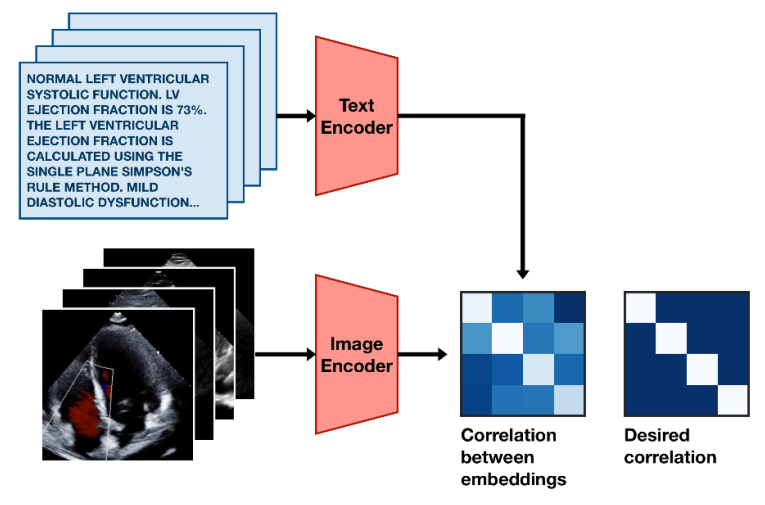

## Evaluation

EchoCLIP was assessed on zero-shot tasks, including binary classification and continuous value regression. For binary classification, text prompts for positive cases were compared with video embeddings from the test set using cosine similarity as the zero-shot prediction, with actual report labels used for performance metrics like AUC. For regression, text prompts with varying values were embedded, and cosine similarity was used to predict values based on the median of the top 20% of prompt embeddings. This process was repeated for the first 10 frames of each video, and the final prediction was the average of these per-frame predictions.

## Performance and Results

EchoCLIP achieved the following zero-shot classification of videos:

- Percutaneous mitral valve repair identification: AUC of 0.97 (95% CI: 0.97-0.98)
- Transvenous aortic valve replacement (TAVR) identification: AUC of 0.92 (95% CI: 0.91-0.92)
- Pacemaker/defibrillator leads identification: AUC of 0.84 (95% CI: 0.84-0.85)
- Severe dilation detection of the right ventricle: AUC of 0.92 (95% CI: 0.91-0.92)
- Severe dilation detection of the right atrium: AUC of 0.97 (95% CI: 0.97-0.98)
- Severe dilation detection of the left ventricle: AUC of 0.92 (95% CI: 0.92-0.93)
- Severe dilation detection of the left atrium: AUC of 0.91 (95% CI: 0.90-0.92)

EchoCLIP's prediction accuracy for left-ventricular ejection fraction:
- MAE of 8.4% on the internal test dataset and MAE of 7.1% on the external test set.

EchoCLIP's prediction accuracy for estimated pulmonary arterial pressure:
- MAE of 10.8 mmHg on both internal and external test datasets.

Additionally:

- The EchoCLIP-R model (the long-context variant), using a cardiology-specific tokenizer, ranks the correct clinical report 209th on average out of 21,484 candidates in the held-out test cohort.
- The correct report is in the top 10 ranked reports 33.3% of the time when matching images to reports.
- When matching text to video, the correct video ranks 203rd on average out of 21,484, and is in the top 10 ranked videos 34.3% of the time.
- EchoCLIP-R can measure similarity between echocardiograms to identify unique patients across multiple studies and detect clinical changes over time, tasks challenging for human clinicians.

Measuring the cosine similarity between EchoCLIP-R embeddings can be used to distinguish between image pairs from different patients. Thus results in:

- Identification of the same patients across different videos: AUC of 0.86 (95% CI: 0.86-0.86)
- Prediction if an echocardiogram occurs before or after cardiac surgery with an AUC of 0.77 (95% CI: 0.75-0.79)
- Prediction if an echocardiogram occurs before or after heart transplant with an AUC of 0.79 (95% CI: 0.76-0.82)

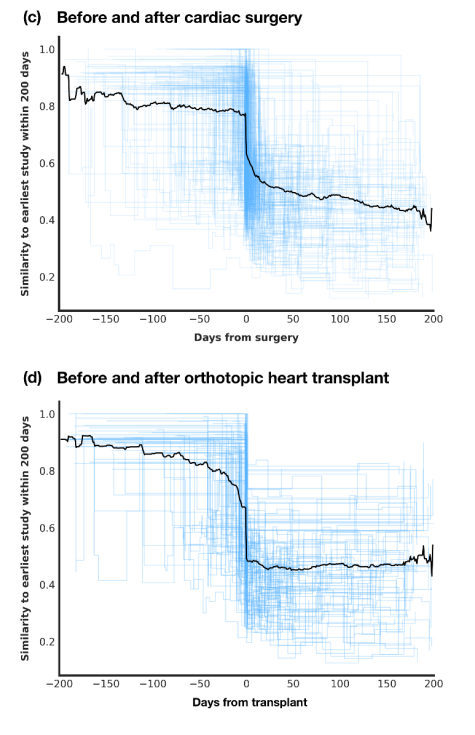

## Source Code

The source code is located at: https://github.com/echonet/echo_CLIP

## Running the Source Code

The default installation instructions will install Pytorch without GPU support and the project won't run. You can find modified instructions that work for Nvidia GeForce 3090 and CUDA 11.8 installed. For other configurations, please select proper packages accordingly. Use the following URL to determine the correct pytorch installation according to your GPU:

https://pytorch.org/get-started/locally/

For my configuration this was the proper configuration:

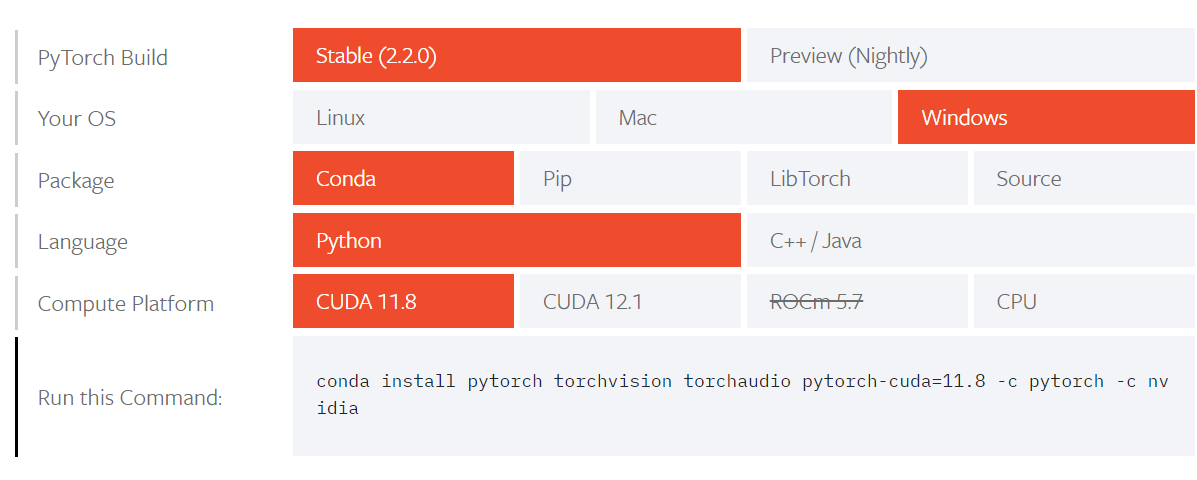

```
git clone https://github.com/echonet/echo_CLIP
cd echo_CLIP
conda create -n echo-clip
conda activate echo-clip
conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
conda install sentencepiece
pip install open_clip_torch huggingface_hub tokenizers opencv-python-headless
```

### Result From Running The Code

```
(echo-clip) C:\personal\ai\echo_CLIP>python embedding_example.py
C:\personal\ai\echo_CLIP\utils.py:202: SyntaxWarning: invalid escape sequence '\.'
  add_period = [f"(?:{a})(?!\.)" for a in add_period]
tensor([[907, 261, 464, 800, 887, 469, 792, 887, 669, 804,  66, 830, 881, 788,
         697, 882, 634, 371, 884, 627, 800, 581, 882,  51, 168, 474, 882, 467,
         789, 887, 459, 783, 887, 394, 726, 575, 820, 887, 232, 882,  87, 547,
         486, 604, 782, 889, 789, 702, 677, 702, 702, 766, 488, 689, 883, 613,
         437, 176, 465, 496, 812, 887, 597, 820, 431, 882, 881, 883, 686, 336,
         908,   0,   0,   0,   0,   0,   0]], device='cuda:0')
C:\Users\User\anaconda3\envs\echo-clip\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
torch.Size([1, 512])
torch.Size([1, 512])
0.443359375

(echo-clip) C:\personal\ai\echo_CLIP>python zero_shot_example.py
['ECHO DENSITY IN RIGHT VENTRICLE SUGGESTIVE OF CATHETER, PACER LEAD, OR ICD LEAD. ', 'ECHO DENSITY IN RIGHT ATRIUM SUGGESTIVE OF CATHETER, PACER LEAD, OR ICD LEAD. ']
tensor([[49406, 13989, 22431,   530,  1155,  1240,  9511,   579, 15033,   563,
           539,  7174,   652,   267,  2332,   528,  2784,   267,   541,   535,
           323,  2784,   269, 49407,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0],
        [49406, 13989, 22431,   530,  1155, 29725, 15033,   563,   539,  7174,
           652,   267,  2332,   528,  2784,   267,   541,   535,   323,  2784,
           269, 49407,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], device='cuda:0')
C:\Users\User\anaconda3\envs\echo-clip\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
torch.Size([2, 512])
Pacemaker detected: True
['THE LEFT VENTRICULAR EJECTION FRACTION IS ESTIMATED TO BE <#>% ', 'LV EJECTION FRACTION IS <#>%. ']
Predicted ejection fraction is 19.3%
```